<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.673202,-61.737345,-20.064143,70.198597,-90.262740
1,0.0,1.0,83.980440,-138.649132,-44.668691,68.037532,-112.706223
2,0.0,2.0,88.514009,-193.103134,-94.589125,67.850228,-162.439353
3,0.0,3.0,25.569742,16.053608,51.623350,70.450760,-18.827411
4,0.0,4.0,39.871555,100.332284,150.203839,69.859883,80.343955
...,...,...,...,...,...,...,...
29995,999.0,25.0,57.157606,-122.142525,-54.984919,61.601287,-116.586206
29996,999.0,26.0,90.713468,-35.238905,65.474563,103.047900,-37.573337
29997,999.0,27.0,49.653681,-42.946557,16.707124,52.332795,-35.625671
29998,999.0,28.0,21.153421,-44.855330,-13.701909,17.130622,-30.832531


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.673202,-61.737345,-20.064143,70.198597,-90.262740
1,0.0,1.0,83.980440,-138.649132,-44.668691,68.037532,-112.706223
2,0.0,2.0,88.514009,-193.103134,-94.589125,67.850228,-162.439353
3,0.0,3.0,25.569742,16.053608,51.623350,70.450760,-18.827411
4,0.0,4.0,39.871555,100.332284,150.203839,69.859883,80.343955
...,...,...,...,...,...,...,...
29995,999.0,25.0,57.157606,-122.142525,-54.984919,61.601287,-116.586206
29996,999.0,26.0,90.713468,-35.238905,65.474563,103.047900,-37.573337
29997,999.0,27.0,49.653681,-42.946557,16.707124,52.332795,-35.625671
29998,999.0,28.0,21.153421,-44.855330,-13.701909,17.130622,-30.832531


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    31.673202  -61.737345  -20.064143   70.198597  -90.262740
      1.0    83.980440 -138.649132  -44.668691   68.037532 -112.706223
      2.0    88.514009 -193.103134  -94.589125   67.850228 -162.439353
      3.0    25.569742   16.053608   51.623350   70.450760  -18.827411
      4.0    39.871555  100.332284  150.203839   69.859883   80.343955
...                ...         ...         ...         ...         ...
999.0 25.0   57.157606 -122.142525  -54.984919   61.601287 -116.586206
      26.0   90.713468  -35.238905   65.474563  103.047900  -37.573337
      27.0   49.653681  -42.946557   16.707124   52.332795  -35.625671
      28.0   21.153421  -44.855330  -13.701909   17.130622  -30.832531
      29.0   40.214325  -32.797298   17.417027   40.673749  -23.256721

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    31.673202  -61.737345  -20.064143   70.198597  -90.262740
      1.0    83.980440 -138.649132  -44.668691   68.037532 -112.706223
      2.0    88.514009 -193.103134  -94.589125   67.850228 -162.439353
      3.0    25.569742   16.053608   51.623350   70.450760  -18.827411
      4.0    39.871555  100.332284  150.203839   69.859883   80.343955
...                ...         ...         ...         ...         ...
999.0 25.0   57.157606 -122.142525  -54.984919   61.601287 -116.586206
      26.0   90.713468  -35.238905   65.474563  103.047900  -37.573337
      27.0   49.653681  -42.946557   16.707124   52.332795  -35.625671
      28.0   21.153421  -44.855330  -13.701909   17.130622  -30.832531
      29.0   40.214325  -32.797298   17.417027   40.673749  -23.256721

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.673202,-61.737345,-20.064143,70.198597,-90.262740
1,0.0,1.0,83.980440,-138.649132,-44.668691,68.037532,-112.706223
2,0.0,2.0,88.514009,-193.103134,-94.589125,67.850228,-162.439353
3,0.0,3.0,25.569742,16.053608,51.623350,70.450760,-18.827411
4,0.0,4.0,39.871555,100.332284,150.203839,69.859883,80.343955
...,...,...,...,...,...,...,...
29995,999.0,25.0,57.157606,-122.142525,-54.984919,61.601287,-116.586206
29996,999.0,26.0,90.713468,-35.238905,65.474563,103.047900,-37.573337
29997,999.0,27.0,49.653681,-42.946557,16.707124,52.332795,-35.625671
29998,999.0,28.0,21.153421,-44.855330,-13.701909,17.130622,-30.832531


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    31.673202  -61.737345  -20.064143   70.198597  -90.262740
      1.0    83.980440 -138.649132  -44.668691   68.037532 -112.706223
      2.0    88.514009 -193.103134  -94.589125   67.850228 -162.439353
      3.0    25.569742   16.053608   51.623350   70.450760  -18.827411
      4.0    39.871555  100.332284  150.203839   69.859883   80.343955
...                ...         ...         ...         ...         ...
999.0 25.0   57.157606 -122.142525  -54.984919   61.601287 -116.586206
      26.0   90.713468  -35.238905   65.474563  103.047900  -37.573337
      27.0   49.653681  -42.946557   16.707124   52.332795  -35.625671
      28.0   21.153421  -44.855330  -13.701909   17.130622  -30.832531
      29.0   40.214325  -32.797298   17.417027   40.673749  -23.256721

[30000 rows x 5 columns]

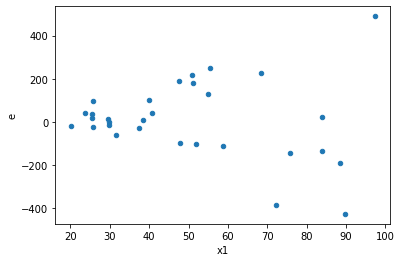

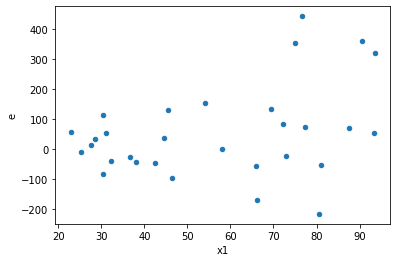

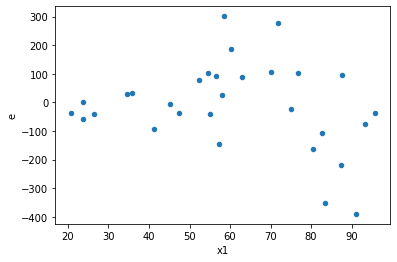

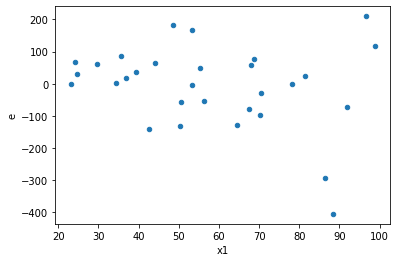

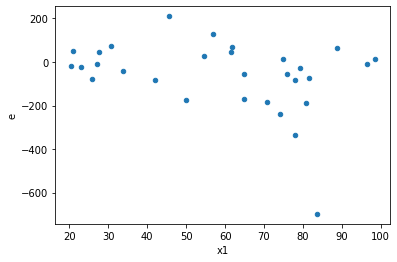

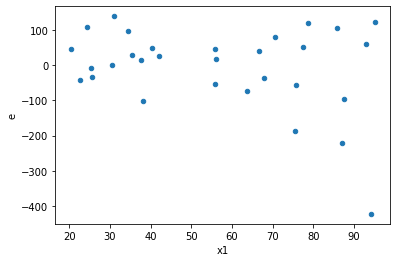

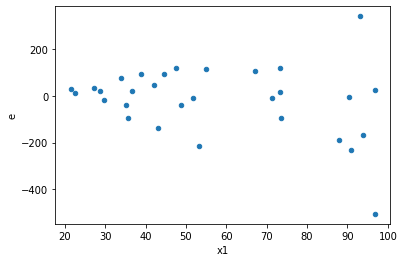

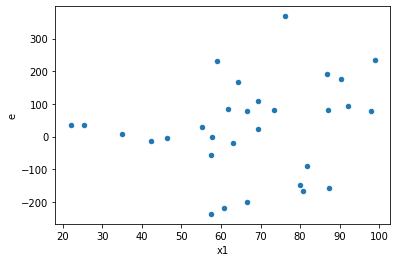

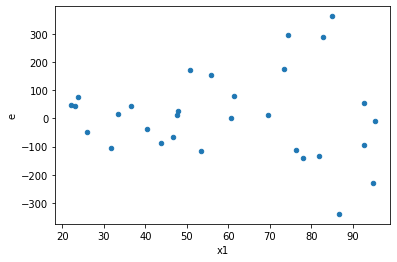

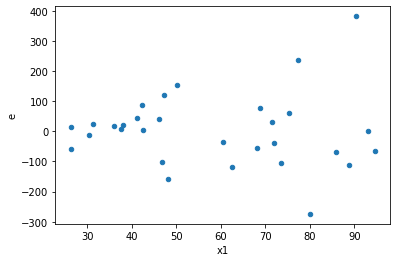

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,11.0,31240.797440952912,419364.45949277445,2840.072494632083,38124.041772070406,13.423615715488694,0.00015487602379815613,0.9999225619881009,7.743801189907806e-05,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,164773.08797627175,310781.35245266865,14979.371634206524,28252.85022296988,1.8861171825427154,0.30754751317357587,0.8462262434132121,0.15377375658678794,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,33634.16507958617,500114.17707413883,3057.65137087147,45464.925188558074,14.86923120852721,9.39373579138536e-05,0.9999530313210431,4.69686789569268e-05,Reject001=0 : Heteroscedasticity
9.0,11.0,11.0,25764.436915557668,320886.9749564023,2342.22153777797,29171.543177854757,12.454647311257055,0.0002225129726554087,0.9998887435136723,0.00011125648632770435,Reject001=0 : Heteroscedasticity
11.0,11.0,11.0,50187.95035379863,679484.8075309931,4562.540941254421,61771.346139181194,13.538803691742398,0.0001485742407767443,0.9999257128796116,7.428712038837215e-05,Reject001=0 : Heteroscedasticity
12.0,11.0,11.0,42464.69306726464,723025.6390343272,3860.4266424786038,65729.6035485752,17.026512775897025,4.8022782511036866e-05,0.9999759886087445,2.4011391255518433e-05,Reject001=0 : Heteroscedasticity
14.0,11.0,11.0,53312.143176039295,560645.9716994987,4846.558470549026,50967.815609045334,10.516290253952432,0.000497603557608306,0.9997511982211958,0.000248801778804153,Reject001=0 : Heteroscedasticity
15.0,11.0,11.0,82067.32416512648,394867.9344723556,7460.665833193317,35897.084952032325,4.8115122369269345,0.014930413232039363,0.9925347933839803,0.007465206616019682,Reject001=1 : Homoscedasticity
17.0,11.0,11.0,101495.12383159962,1200957.7852843583,9226.82943923633,109177.9804803962,11.832664860599445,0.0002845008347753808,0.9998577495826123,0.0001422504173876904,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,787618.6155792024,16938.323519734506,71601.69232538204,1539.8475927031368,0.021505742988665047,2.665881708551023e-07,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,31240.797440952912,419364.45949277445,2840.072494632083,38124.041772070406,13.423615715488694,0.00015487602379815613,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,307120.23589944176,30206.473387427344,27920.021445403796,2746.0430352206677,0.09835390136037027,0.0005828570362968142,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,319596.292036741,85589.58393966948,29054.208366976454,7780.87126724268,0.2678053096117587,0.03873945547455765,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,468409.3960148901,101519.59608261554,42582.67236499001,9229.054189328685,0.21673262096430781,0.017584507950512227,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,299723.03209664416,52155.00411215935,27247.548372422196,4741.364010196305,0.1740106649372953,0.007286793232551538,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,435650.46533055726,45977.931903052915,39604.58775732339,4179.811991186629,0.10553858095426656,0.0008088454451761879,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,164773.08797627175,310781.35245266865,14979.371634206524,28252.85022296988,1.8861171825427154,0.30754751317357587,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,33634.16507958617,500114.17707413883,3057.65137087147,45464.925188558074,14.86923120852721,9.39373579138536e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    630
Reject001=1 : Homoscedasticity      370
Name: Result_test, dtype: int64